In [1]:
from algorithm.utils.data.tf.dataimage import DataImage
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.get_logger().setLevel('WARNING')
import keras
%load_ext tensorboard

In [2]:
normalize = True
mean = 'auto' # 'auto' -> mean_value = [float(1/255), float(1/255), float(1/255)]
mean_value = [float(1/255), float(1/255), float(1/255)]

In [3]:
dataset = DataImage(data_path="../Input/dataset", split=0.2, resize=True, height='auto', width='auto', normalize=normalize, mean=mean, name="Electronic components dataset", batch_size=16)

In [4]:
dataset

Electronic components dataset
	Number of points: 2884
	Root location: ../Input/dataset
	Split: 0.2
	Transform used:	Resize(size=(128, 128)
	Normalize(mean=[0.00392156862745098, 0.00392156862745098, 0.00392156862745098], std=None)


In [5]:
trainset = dataset.get_set(split="train")
validset = dataset.get_set(split="validation")

In [6]:
# get some random training images
dataiter = iter(validset)
images, labels = next(dataiter)

In [7]:
images

{'data': <tf.Tensor: shape=(16, 128, 128, 3), dtype=float32, numpy=
 array([[[[0.10588236, 0.15294118, 0.09803922],
          [0.10588236, 0.15294118, 0.09803922],
          [0.10588236, 0.15294118, 0.09803922],
          ...,
          [0.09803922, 0.14509805, 0.09019608],
          [0.10588236, 0.15294118, 0.09803922],
          [0.10588236, 0.15294118, 0.09803922]],
 
         [[0.10588236, 0.15294118, 0.09803922],
          [0.10588236, 0.15294118, 0.09803922],
          [0.10588236, 0.15294118, 0.09803922],
          ...,
          [0.09803922, 0.14509805, 0.09019608],
          [0.10588236, 0.15294118, 0.09803922],
          [0.10588236, 0.15294118, 0.09803922]],
 
         [[0.10588236, 0.15294118, 0.09803922],
          [0.10588236, 0.15294118, 0.09803922],
          [0.10588236, 0.15294118, 0.09803922],
          ...,
          [0.09803922, 0.14509805, 0.09019608],
          [0.10588236, 0.15294118, 0.09803922],
          [0.10588236, 0.15294118, 0.09803922]],
 
         ...,


In [8]:
labels

<tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'Rectangular pin', b'Not mounted', b'Ceramic capacitor',
       b'Ceramic capacitor', b'Jumper cut', b'Resistor',
       b'Rectangular pin', b'Rectangular pin', b'Rectangular pin', b'LED',
       b'LED', b'Ceramic capacitor', b'Resistor', b'Not mounted',
       b'Ceramic capacitor', b'Rectangular pin'], dtype=object)>

In [9]:
class_names = dataset.labels

In [10]:
class_names

['Ceramic capacitor',
 'Connector',
 'Diode',
 'Dip Switch',
 'Fuse',
 'IC',
 'Inductor',
 'Jumper',
 'Jumper cut',
 'LED',
 'Minimelf',
 'Not mounted',
 'Optoisolator',
 'Oscillator',
 'Pushbutton',
 'Rectangular pin',
 'Relais',
 'Resistor',
 'Resistor Network',
 'SOT',
 'TO252',
 'Tantalum capacitor']

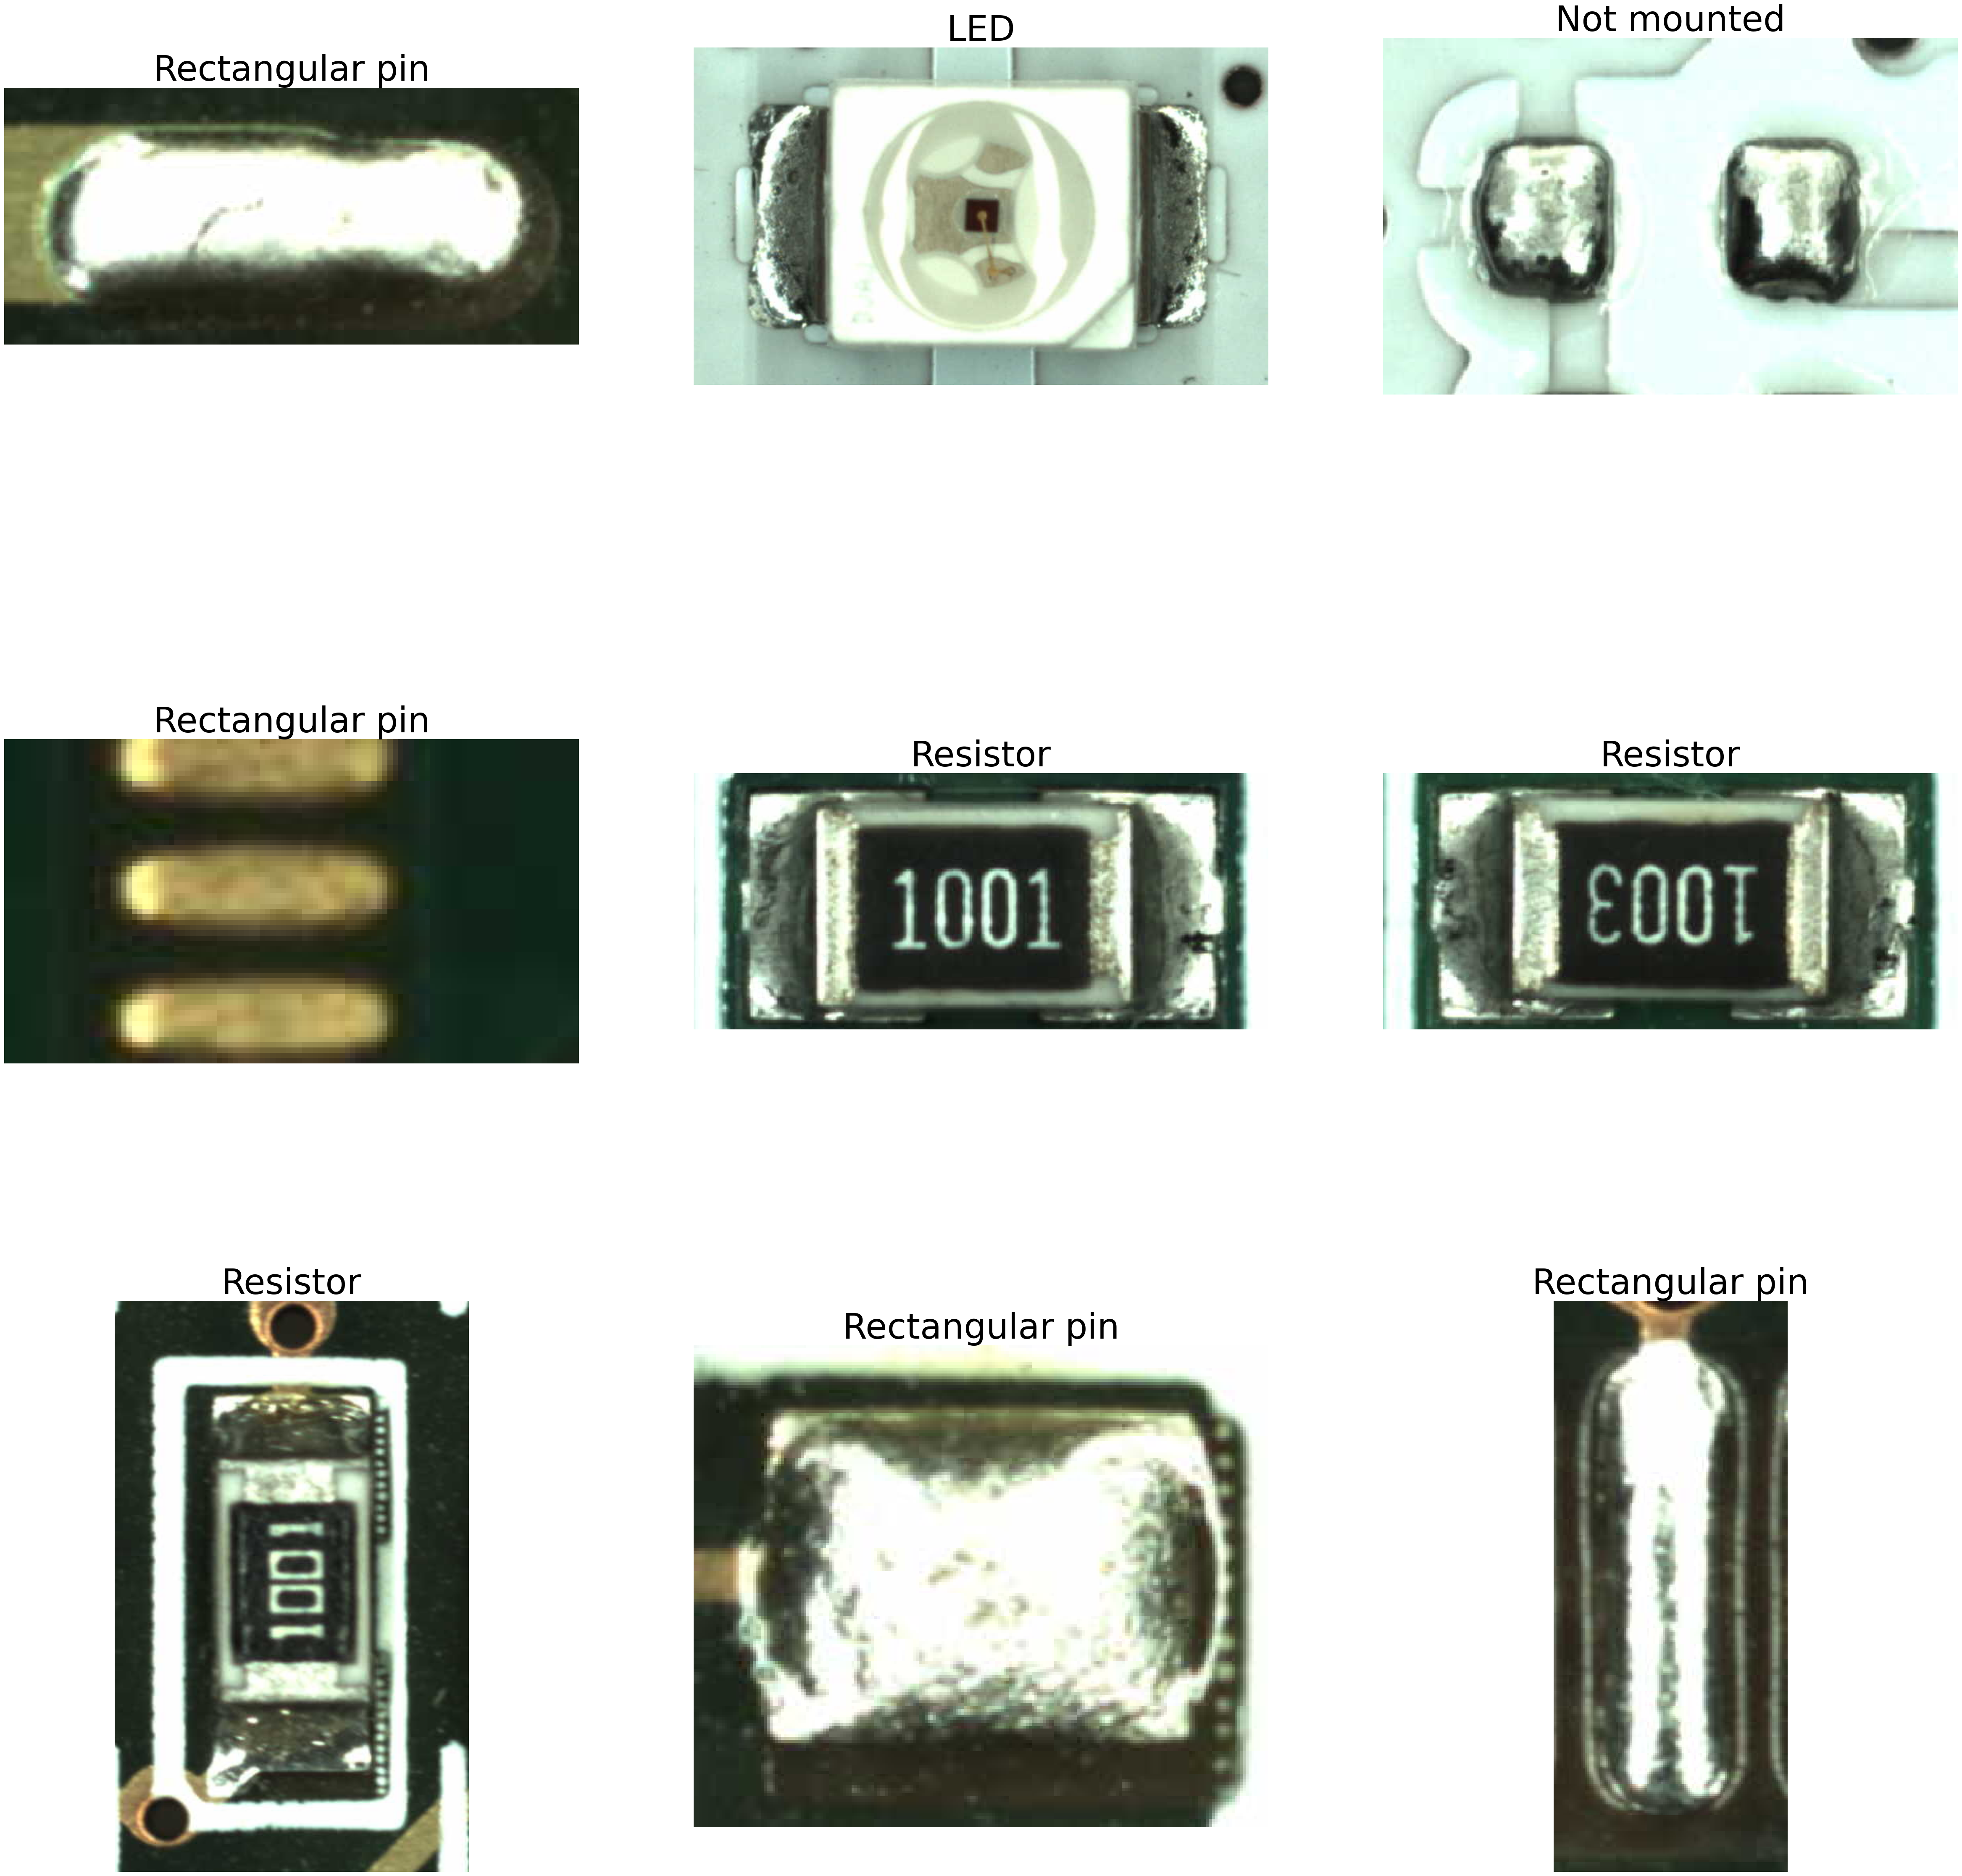

In [11]:
import matplotlib.pyplot as plt
import numpy as np
image_batch, label_batch = next(iter(validset))

plt.figure(figsize=(60, 60))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    printable_object = dataset.print_item(image_batch['print_object'][i])
    plt.imshow(printable_object)
    label = label_batch[i].numpy().decode("utf-8")
    plt.title(label, fontsize=60)
    plt.axis("off")

In [12]:
validset = dataset.apply_one_hot_encoding(validset)

In [13]:
in_dir = "../out/models/ResNet2__0_3"

In [14]:
model = keras.models.load_model(in_dir)

In [15]:
# Evaluation on unseen data.
test_loss, test_acc = model.evaluate(validset, verbose=2)
print('\nTest accuracy:', test_acc)

36/36 - 5s - loss: 1.1942e-07 - accuracy: 1.0000 - 5s/epoch - 148ms/step

Test accuracy: 1.0
